<a href="https://colab.research.google.com/github/jbrewer98/CS-1101-Debugging-Lecture/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import packages
import time
from copy import deepcopy
import json
import pymongo
import os
import datetime
import pandas as pd
import timeit

In [3]:
#get the username and and password information - You need to run it one time at start.
# it will prompt you and ask for input
# test

from getpass import getpass

USER = getpass('Enter User Name here: ')
PASS = getpass('Enter Password here: ')
HOST = getpass('Enter HOST here (it should be the name of your AWS instace - you use it to connect to your instance) : ')
PORT = getpass('Enter PORT here - unless you changed it, it is the default mongodb port -27017: ')

Enter User Name here: ··········
Enter Password here: ··········
Enter HOST here (it should be the name of your AWS instace - you use it to connect to your instance) : ··········
Enter PORT here - unless you changed it, it is the default mongodb port -27017: ··········


In [0]:
#set up mongo connection
mongo_url = "mongodb://{}:{}@{}:{}/?authSource={}".format(USER,
                                                         PASS,
                                                         HOST,
                                                         PORT,
                                                         "lahman")

client = pymongo.MongoClient(mongo_url)

In [5]:
#get access to a specific database. this will work if you imported the data properly as instructed
db = client['lahman']
#now print all collection names
print("collection names: {}".format(db.list_collection_names()))
reading = db['Batting'].find_one()
#print one batting documents
reading["_id"] = str(reading["_id"])
print(reading)



collection names: ['Schools', 'FieldingOF', 'AwardsPlayers', 'Managers', 'Appearances', 'TeamsFranchises', 'AwardsManagers', 'SeriesPost', 'AwardsShareManagers', 'AwardsSharePlayers', 'SchoolsPlayers', 'Pitching', 'Batting', 'BattingPost', 'PitchingPost', 'ManagersHalf', 'HallOfFame', 'TeamsHalf', 'Fielding', 'AllstarFull', 'Teams', 'FieldingPost', 'Master', 'Salaries']
{'_id': '5e49faeb73e7093b20fb4375', 'playerID': 'aardsda01', 'yearID': 2004, 'stint': 1, 'teamID': 'SFN', 'lgID': 'NL', 'G': 11, 'G_batting': 11, 'AB': 0, 'R': 0, 'H': 0, '2B': 0, '3B': 0, 'HR': 0, 'RBI': 0, 'SB': 0, 'CS': 0, 'BB': 0, 'SO': 0, 'IBB': 0, 'HBP': 0, 'SH': 0, 'SF': 0, 'GIDP': 0, 'G_old': 11}


In [128]:
def query_1():
  # The number of all stars in allstarfull.

  query = {}
  result = db['AllstarFull'].count_documents(query)
  print(result)
  

query_1()

4834


In [136]:
def query_2():
  # The most home runs in a season by a single player (using the batting table).

  query = {}
  result = db['Batting'].find(query)
  data = []

  for x in result:
    if x["HR"] != "":
      data.append(x["HR"])

  data = list(map(int, data))
  print(max(data))
  
query_2()

73


In [137]:
def query_3():
  # The playerid of the player with the most home runs in a season.

  query = {"HR": {"$ne": ""}}
  result = db['Batting'].find(query)

  data = [x for x in result]

  df = pd.DataFrame(data = data)
  index = df["HR"].idxmax()
  print(df["playerID"][index])
  
query_3()

bondsba01


In [138]:
def query_4():
  # The number of leagues in the batting table.

  query = {}
  result = db['Batting'].find(query)
  data = [x for x in result]
  
  df = pd.DataFrame(data = data)
  print(df["lgID"].nunique())
  
query_4()

7


In [139]:
def query_5():
  # Barry Bond's average batting average (playerid = 'bondsba01') where batting average is hits / at-bats. 
  # Note you will nead to cast hits to get a decimal: cast(h as real)

  query = {"playerID": {"$eq": "bondsba01"}}
  result = db['Batting'].find(query)
  data = [x for x in result]
  
  df = pd.DataFrame(data = data)
  average = (df["H"]/df["AB"]).mean()
  print(average)
  
query_5()

0.2983057628600463


In [140]:
def query_6():
  # The teamid with the fewest hits in the year 2000 (ie., yearid = '2000').
  # Return both the teamid, and the number of hits.

  query = {"yearID": {"$eq": 2000}}
  result = db['Teams'].find(query)
  data = [x for x in result]
  
  
  df = pd.DataFrame(data = data)
  index = df["H"].idxmin()
  print("Team:",df["teamID"][index],"Hits:",df["H"][index])
  
query_6()

Team: MIL Hits: 1366


In [141]:
def query_7():
  # The teamid in the year 2000 (i.e., yearid = '2000') with the highest average batting average.
  # Return the teamid and the average. To prevent divsion by 0, limit at-bats > 0.

  query = {"yearID": {"$eq": 2000},"AB": {"$ne": ""}}
  result = db['Batting'].find(query)
  data = [x for x in result]
  
  df = pd.DataFrame(data = data)
  df['BAvg'] = df["H"]/df["AB"]

  teamAvg = df.groupby(['teamID'])['BAvg'].mean()
  index = teamAvg.idxmax()
  print(index,teamAvg[index])
  
  
query_7()

SEA 0.2807991584890046


In [142]:
def query_8():
  # The number of all stars the giants (teamid = 'SFN') had in 2000.

  query = {"yearID": {"$eq": 2000},"teamID": {"$eq": 'SFN'}}
  result = db['AllstarFull'].count_documents(query)

  print(result)
  
  
query_8()

2


In [25]:
def query_9():
  # The yearid which the giants had the most all stars.

  query = {"teamID": {"$eq": 'SFN'}}
  result = db['AllstarFull'].find(query)
  data = [x for x in result]
  
  df = pd.DataFrame(data = data)
  
  yearCount = df.groupby(['yearID'])['yearID'].count()

  print(yearCount.idxmax())
  
  
query_9()

1961


In [30]:
def query_10():
  # The average salary in year 2000.

  query = {'yearID': {"$eq": 2000}}
  result = db['Salaries'].find(query)
  data = [x for x in result]
  
  df = pd.DataFrame(data = data)

  print(df['salary'].mean())
  
  
query_10()

1992984.5717703348


In [64]:
def query_11():
  # The number of positions (e.g., catchers, pitchers) that have average 
  # salaries greather than 2000000 in yearid 2000. 
  # dictionary where key is playerID, value is salary
  # Second dictionary where key is position, value is list of players

  query = {'yearID': {"$eq": 2000}}
  salaries = db['Salaries'].find(query)
  pos = db['Fielding'].find(query)
  playerdata = {}

  for x in salaries:
    if x['playerID'] in playerdata.keys():
      playerdata[x['playerID']]=playerdata[x['playerID']]+x['salary']
    playerdata[x['playerID']] = x['salary']

  posdata={}
  for x in pos:
    if x['POS'] is not None and x['playerID'] in playerdata.keys():
      if x['POS'] not in posdata.keys():
        posdata[x['POS']] =[]
      else:
        posdata[x['POS']].append(playerdata[x['playerID']])
        
  count = 0

  for x in posdata:
    if sum(posdata[x])/len(posdata[x]) > 2000000:
      count += 1


  print(count)
  
  
query_11()

3


In [71]:
def query_12():
  # The number of errors Barry Bonds had in 2000.

  query = {'yearID': {"$eq": 2000},'playerID': {"$eq": 'bondsba01'}}
  data = db['Fielding'].find(query)
  df = pd.DataFrame(data = data)
  df.drop_duplicates()


  print(df['E'][0])
  
  
query_12()

3


In [86]:
def query_13():
  # The average salary of all stars in 2000.

  query = {'yearID': {"$eq": 2000}}
  allstar = db['AllstarFull'].find(query)
  salary = db['Salaries'].find(query)

  dataAS = [x for x in allstar]
  dataSal = [x for x in salary]

  dfAS = pd.DataFrame(data = dataAS)
  dfSal = pd.DataFrame(data = dataSal)

  dfm = dfAS.merge(dfSal, on = 'playerID')



  print(dfm['salary'].mean())
  
  
query_13()

5388841.029411765


In [119]:
def query_14():
  # The average salary of non-all stars in 2000.

  query = {'yearID': {"$eq": 2000}}
  allstar = db['AllstarFull'].find(query)
  salary = db['Salaries'].find(query)

  dataAS = [x for x in allstar]
  dataSal = [x for x in salary]

  dfAS = pd.DataFrame(data = dataAS)
  dfSal = pd.DataFrame(data = dataSal)

  dfm = dfSal.merge(dfAS, on = 'playerID',how = 'left')
  dfm = dfm.loc[pd.isnull(dfm['GP'])]


  print(dfm['salary'].mean())
  
  
query_14()

1692309.78125


4834
4834
4834
4834
4834
4834
4834
4834
4834
4834
73
73
73
73
73
73
73
73
73
73
bondsba01
bondsba01
bondsba01
bondsba01
bondsba01
bondsba01
bondsba01
bondsba01
bondsba01
bondsba01
7
7
7
7
7
7
7
7
7
7
0.2983057628600463
0.2983057628600463
0.2983057628600463
0.2983057628600463
0.2983057628600463
0.2983057628600463
0.2983057628600463
0.2983057628600463
0.2983057628600463
0.2983057628600463
Team: MIL Hits: 1366
Team: MIL Hits: 1366
Team: MIL Hits: 1366
Team: MIL Hits: 1366
Team: MIL Hits: 1366
Team: MIL Hits: 1366
Team: MIL Hits: 1366
Team: MIL Hits: 1366
Team: MIL Hits: 1366
Team: MIL Hits: 1366
SEA 0.2807991584890046
SEA 0.2807991584890046
SEA 0.2807991584890046
SEA 0.2807991584890046
SEA 0.2807991584890046
SEA 0.2807991584890046
SEA 0.2807991584890046
SEA 0.2807991584890046
SEA 0.2807991584890046
SEA 0.2807991584890046
2
2
2
2
2
2
2
2
2
2
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1992984.5717703348
1992984.5717703348
1992984.5717703348
1992984.5717703348
1992984.5717703348
19929

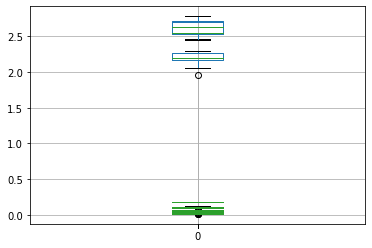

In [143]:
#Time it

trial1 = timeit.repeat(query_1, repeat = 10, number = 1);
df1 = pd.DataFrame(data = trial1)
df1.boxplot()

trial2 = timeit.repeat(query_2, repeat = 10, number = 1);
df2 = pd.DataFrame(data = trial2)
df2.boxplot()

trial3 = timeit.repeat(query_3, repeat = 10, number = 1);
df3 = pd.DataFrame(data = trial3)
df3.boxplot()

trial4 = timeit.repeat(query_4, repeat = 10, number = 1);
df4 = pd.DataFrame(data = trial4)
df4.boxplot()

trial5 = timeit.repeat(query_5, repeat = 10, number = 1);
df5 = pd.DataFrame(data = trial5)
df5.boxplot()

trial6 = timeit.repeat(query_6, repeat = 10, number = 1);
df6 = pd.DataFrame(data = trial6)
df6.boxplot()

trial7 = timeit.repeat(query_7, repeat = 10, number = 1);
df7 = pd.DataFrame(data = trial7)
df7.boxplot()

trial8 = timeit.repeat(query_8, repeat = 10, number = 1);
df8 = pd.DataFrame(data = trial8)
df8.boxplot()

trial9 = timeit.repeat(query_9, repeat = 10, number = 1);
df9 = pd.DataFrame(data = trial9)
df9.boxplot()

trial10 = timeit.repeat(query_10, repeat = 10, number = 1);
df10 = pd.DataFrame(data = trial10)
df10.boxplot()

trial11 = timeit.repeat(query_11, repeat = 10, number = 1);
df11 = pd.DataFrame(data = trial11)
df11.boxplot()

trial12 = timeit.repeat(query_12, repeat = 10, number = 1);
df12 = pd.DataFrame(data = trial12)
df12.boxplot()

trial13 = timeit.repeat(query_13, repeat = 10, number = 1);
df13 = pd.DataFrame(data = trial13)
df13.boxplot()

trial14 = timeit.repeat(query_14, repeat = 10, number = 1);
df14 = pd.DataFrame(data = trial14)
df14.boxplot()






